# Linear Regression with Regularization Project

This project provides a comprehensive implementation and analysis of linear regression algorithms from scratch, including Ordinary Least Squares (OLS), Ridge Regression (L2 regularization), and comparative analysis with Lasso Regression (L1 regularization). The project explores both analytical (closed-form) solutions and iterative gradient descent optimization, with detailed analysis of learning rates, regularization effects, and model evaluation techniques.

## Project Overview

This project covers:

1. **Ordinary Least Squares (OLS)**: 
   - Analytical solution using matrix pseudo-inverse
   - Gradient descent implementation with learning rate analysis
   - Feature normalization and its importance
   - Model evaluation with train/test splits and statistical testing

2. **Ridge Regression (L2 Regularization)**: 
   - Implementation using both analytical solution and gradient descent
   - Mathematical derivation of Ridge regression solution
   - Regularization parameter effects on model complexity

3. **Regularization Comparison**: 
   - Comparative analysis of Ridge (L2) vs Lasso (L1) regularization
   - Coefficient path analysis showing sparsity vs shrinkage effects
   - Practical guidance on when to use each regularization technique

**Dataset**: Diabetes regression dataset from scikit-learn, predicting disease progression based on physiological measurements.

## Theoretical Background: Ordinary Least Squares (OLS)

### Mathematical Formulation

In matrix notation:
- **$X$**: Feature matrix of dimensions $n \times p$, where $n$ is the number of samples and $p$ is the number of features
- **$y$**: Target vector of dimension $n \times 1$
- **$w$**: Weight vector of dimensions $p \times 1$

The linear model is: $\hat{y}=X\cdot w$

For simplicity, $X$ is assumed to include a column of ones (bias term) to account for the intercept.

### Loss Function

The objective is to minimize the Residual Sum of Squares (RSS):

$$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$$

In matrix notation, this sums over all examples, resulting in a scalar loss value.

### Optimization Methods

**1. Analytical Solution (Closed Form):**

Taking the derivative with respect to $w$ and setting it to zero:

$$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y) = 0$$

Solving for $w$:

$$w_{OLS}=(X^TX)^{-1}X^Ty$$

The term $(X^TX)^{-1}X^T$ is known as the **pseudo-inverse** of $X$.

**2. Gradient Descent (Iterative):**

$$w'=w-\alpha \frac{2}{N}X^T(Xw-y)$$

where $\alpha$ is the learning rate.

**References:**
- [Matrix Derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf)
- [Stanford OLS Notes](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf)


## Part 1: Ordinary Least Squares Implementation

### Dataset: Diabetes Regression

The diabetes dataset from scikit-learn is used to predict disease progression based on various physiological measurements.

**Dataset Dimensions:**
- **$n$**: Number of samples (rows in the data matrix)
- **$p$**: Number of features (columns in the data matrix)


In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

X, y = load_diabetes(return_X_y=True, scaled=False)


### Implementation: Analytical OLS Solution

An `OrdinaryLinearRegression` class that uses the analytical (closed-form) solution for OLS.

**Class Features:**
- **Property**: `w` - learned weight vector
- **Methods**:
  - `fit(X, y)`: Train the model using analytical solution
  - `predict(X)`: Make predictions on new data
  - `score(X, y)`: Calculate Mean Squared Error (MSE)

**Implementation Note:** `numpy.linalg.pinv` (pseudo-inverse) is used for numerical stability and efficiency, especially when $X^TX$ may be singular or near-singular.


In [2]:
import numpy as np
from numpy.typing import NDArray
from typing import Optional


class OrdinaryLinearRegression(object):
    """Ordinary Least Squares Regression model."""

    def __init__(self) -> None:
        """Initialize OrdinaryLinearRegression model."""
        self.w: Optional[NDArray] = None


    @staticmethod
    def pad(X: NDArray) -> NDArray:
        """Add a column of ones to the input matrix for bias term.

        Args:
            X: Input matrix of shape (n_samples, n_features)

        Returns:
            Padded matrix of shape (n_samples, n_features + 1)
        """
        return np.c_[np.ones(X.shape[0]), X]

    def fit(self, X: NDArray, Y: NDArray, reset: bool = False) -> None:
        """Fit the model using OLS.

        Args:
            X: Training data of shape (n_samples, n_features)
            Y: Target values of shape (n_samples, 1)
            reset: Reset model weights before fitting
        """
        # remember pad with 1 before fitting
        if (self.w is not None) and reset:
            self.w = None

        if len(Y.shape)==1:
            Y = Y.reshape(-1, 1)

        self._fit(self.pad(X), Y)
        return self

    def _fit(self, X: NDArray, Y: NDArray) -> None:
        """Internal fitting method.

        Args:
            X: Padded training data of shape (n_samples, n_features + 1)
            Y: Target values of shape (n_samples, 1)
        """
        # optional to use this
        self.w = np.dot(np.linalg.pinv(X), Y)

    def _predict(self, X: NDArray) -> NDArray:
        """Internal predict method.

        Args:
            X: Padded training data of shape (n_samples, n_features + 1)

        Returns:
            Predicted values of shape (n_samples, 1)
        """
        # optional to use this
        return np.dot(X, self.w)

    def predict(self, X: NDArray) -> NDArray:
        """Predict using the linear model.

        Args:
            X: Input data of shape (n_samples, n_features)

        Returns:
            Predicted values of shape (n_samples, 1)
        """
        # return wx
        if self.w is None:
            raise Exception('Model was not fitted!')
        return self._predict(self.pad(X))
        # return self._predict(self.pad(X))

    def fit_predict(self, X: NDArray, Y: NDArray) -> NDArray:
        """Fit the model and predict."""
        return self.fit(X, Y).predict(X)

    def score(self, X: NDArray, Y: NDArray) -> float:
        """Calculate Mean Squared Error.

        Args:
            X: Input data of shape (n_samples, n_features)
            Y: Target values of shape (n_samples, 1)

        Returns:
            Mean Squared Error between predictions and target values
        """
        # return MSE
        if len(Y.shape)==1:
            Y = Y.reshape(-1, 1)

        return ((self.predict(X) - Y) ** 2).mean()


### Model Evaluation and Analysis

Comprehensive evaluation of the OLS model is performed:

1. **Training Performance**: Fit the model and calculate training MSE
2. **Prediction Visualization**: Create a scatter plot comparing actual vs predicted values to assess model fit
3. **Cross-Validation Analysis**: Split data 20 times (75% train, 25% test) to evaluate model stability and generalization
4. **Statistical Testing**: Use a paired t-test to compare training and testing MSE, providing insights into overfitting/underfitting

**Evaluation Criteria:**
- Model fit on training data
- Evidence of overfitting (gap between train and test MSE)
- Prediction stability across different data splits


In [3]:
ols = OrdinaryLinearRegression()
y_pred = ols.fit_predict(X,y)
mse = ols.score(X, y)
mse

np.float64(2859.6963475867506)

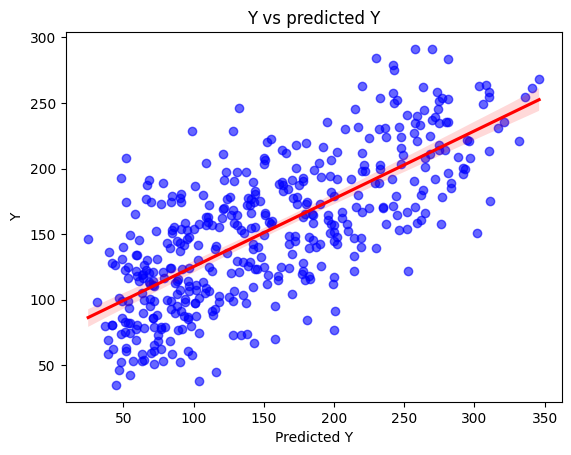

In [4]:
#Create a scatter plot comparing actual values ($y$) on the x-axis versus predicted values ($\hat{y}_{OLS}$ ) on the y-axis
plt.title('Y vs predicted Y')
plt.xlabel('Predicted Y')
plt.ylabel('Y')
sns.regplot(x=y, y=y_pred, scatter_kws={'color': 'blue', 'alpha': 0.6}, 
            line_kws={'color': 'red'})
plt.show()

In [5]:

train_MSES = []
test_MSES = []
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    ols = OrdinaryLinearRegression()
    ols.fit(X_train, y_train)
    train_MSES.append(ols.score(X_train, y_train))
    test_MSES.append(ols.score(X_test, y_test))
print(f'Avg Train MSE {np.mean(train_MSES).round(2)}\nAvg Test MSE {np.mean(test_MSES).round(2)}\n')

Avg Train MSE 2809.85
Avg Test MSE 3109.19



### Statistical Analysis Results

**T-Test Interpretation:**
The paired t-test compares training and testing MSE across multiple splits. A significant p-value indicates a statistically significant difference between train and test performance, which may suggest overfitting or underfitting.

**Key Findings:**
- Average training MSE provides baseline performance
- Average testing MSE indicates generalization capability
- The difference between train and test MSE reveals model complexity and potential overfitting


### Implementation: Gradient Descent Solution

While the analytical solution is efficient for small to medium datasets, gradient descent is more scalable and flexible. An iterative optimization approach is implemented.

**1. Feature Normalization:**

Gradient descent requires normalized features for proper convergence. `StandardScaler` (Z-score normalization: zero mean, unit variance) is used.

**Normalization Rationale:**
- **Why normalize?** Features on different scales cause gradient steps to be inconsistent, leading to slow or unstable convergence
- **How to handle train/test splits?** The scaler is always fitted on training data only, then both train and test sets are transformed to avoid data leakage

**Implementation:** A custom `StandardScaler` implementation is also provided to understand the normalization process.


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normilized_X = scaler.fit_transform(X)

In [7]:
class StandardScalerCustom(object):
    """StandardScaler simple."""

    def __init__(self, with_mean=True, with_std=True) -> None:
        self.with_mean = with_mean
        self.with_std=with_std

    def fit(self, X: NDArray) -> NDArray:
        if len(X.shape) == 1:
            raise('Data needs reshaping')
        self.X = X
        if not self.with_mean:
            self.X_mean = np.zeros(self.X.shape[1])
        else:
            self.X_mean = np.mean(self.X)
        if not self.with_std:
            self.X_std = np.ones(self.X.shape[1])
        else:
            self.X_std = np.std(self.X)
    
    def transform(self, X: NDArray) -> NDArray:
        return (X - self.X_mean) /self.X_std
    
    def fit_transform(self, X: NDArray) -> NDArray:
        return self.fit(X).transform(X)

### Why Normalization Matters

**1. Convergence Stability:**
Gradient descent requires normalized features because:
- Features on different scales cause gradient steps to be inconsistent
- When feature scales differ significantly, they affect the gradient unequally
- This leads to the cost function having inconsistent step sizes, causing slow or unstable convergence
- Normalization ensures all features contribute equally to the gradient calculation

**2. Data Leakage Prevention:**
When using train/test splits or cross-validation:
- **Always fit the scaler on training data only**
- Then transform both training and test sets using the fitted scaler
- This prevents information from the test set leaking into the training process
- Fitting on the full dataset would give the model information about test data distribution

### Gradient Descent Implementation

`OrdinaryLinearRegressionGradientDescent` is implemented, inheriting from `OrdinaryLinearRegression` and using iterative gradient descent optimization.

**Class Parameters:**
- `learning_rate`: Step size for gradient updates (controls convergence speed)
- `num_iterations`: Maximum number of iterations
- `normalize`: Whether to normalize features before training

**Advanced Features:**
- `early_stop`: Automatically stop when loss plateaus (prevents unnecessary iterations)
- `verbose`: Enable detailed logging of iteration number and loss values
- `track_loss`: Save loss history for learning curve visualization

**Benefits of Inheritance:**
- Code reuse: Inherits `predict` and `score` methods
- Consistent interface: Same API as analytical solution
- Extensibility: Easy to add new optimization methods

In [8]:
import numpy as np
from numpy.typing import NDArray
from typing import List, Optional, Union


class OrdinaryLinearRegressionGradientDescent(OrdinaryLinearRegression):
    """Ordinary Least Squares using Gradient Descent optimization."""

    def __init__(
            self,
            learning_rate: float = 0.05,
            num_iterations: int = 1000,
            standardize: bool = True,
            ridge_lambda: float = 0.,
            early_stop: bool = True,
            tol: float = 0.001,
            track_loss: bool = True,
            verbose: bool = True
            ) -> None:
        """Initialize OLS with Gradient Descent.

        Args:
            learning_rate: Step size for gradient descent
            num_iterations: Maximum number of iterations
            standardize: Whether to standardize features
            ridge_lambda: Ridge regularization parameter
            early_stop: Whether to use early stopping
            tol: Tolerance for early stopping
            track_loss: Whether to store loss history
            verbose: Whether to print progress
        """
        super().__init__()
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.ridge_lambda = ridge_lambda
        self.early_stop = early_stop
        self.tol = tol
        self.verbose = verbose
        self.standardize = standardize
        self.scaler: Optional[object] = None
        self.loss: Optional[List] = None
        self.track_loss = track_loss


    def _fit(
        self,
        X: NDArray,
        Y: NDArray,
        track_loss: bool = True
        ) -> Union[List[float], None]:
        """Internal fitting method using gradient descent.

        Args:
            X: Padded training data of shape (n_samples, n_features + 1)
            Y: Target values of shape (n_samples, 1)
            track_loss: Whether to store loss history

        Returns:
            List of loss values if track_loss=True, None otherwise
        """

        # Store original features for loss calculation
        Xorig = X[:, 1:].copy()

        # Standardize features if required
        if self.standardize:
            self.scaler = StandardScaler()
            X[:, 1:] = self.scaler.fit_transform(Xorig)

        # Initialize weights if not already initialized or if reset is True
        if self.w is None:
            self.w = np.random.randn(X.shape[1], 1)

        # Initialize loss tracking if required
        if self.track_loss:
            self.loss = []
            self.loss.append(self.score(Xorig, Y))

        # Perform gradient descent for the specified number of iterations
        for iter in range(self.num_iterations):
            old_w = self.w.copy()
            
            if self.verbose:
                logging = f'iteration {iter}/{self.num_iterations}'
                if not track_loss:
                    print(logging)

            # Perform a single gradient descent step
            self._step(X, Y)
            
            # Check for convergence
            if np.linalg.norm(self.w - old_w) < self.tol:
                if self.verbose:
                    print(f"Converged at iteration {iter}")
                break

            # Track loss if required
            if track_loss:
                loss = self.score(Xorig, Y)
                self.loss.append(loss)
                if self.verbose:
                    logging += f'; loss: {loss:.3f}'
                    print(logging)

                # Check for divergence (loss increasing significantly)
                if len(self.loss) > 1:
                    if self.loss[-1] > 10 * self.loss[0]:  # Loss increased 10x
                        import warnings
                        warnings.warn("Loss is diverging, consider reducing learning rate")
                        break

                # Check if early stopping is enabled and loss has more than one element
                if self.early_stop and (len(self.loss) > 1):
                    # Calculate the difference in loss between the last two iterations
                    loss_diff = self.loss[-2] - self.loss[-1]
                    # If the loss difference is positive and less than the tolerance, stop early
                    if 0 < loss_diff < self.tol:
                        if self.verbose:
                            print('loss is not decreasing')
                        break


    def predict(self, X: NDArray) -> NDArray:
        """Predict using the linear model.

        Args:
            X: Input data of shape (n_samples, n_features)

        Returns:
            Predicted values of shape (n_samples, 1)
        """
        # return wx
        if self.standardize:
            X = self.scaler.transform(X)
        return super().predict(X)



    def _step(self, X: NDArray, Y: NDArray) -> None:
        """Perform one gradient descent step.

        Args:
            X: Input data of shape (n_samples, n_features)
            Y: Target values of shape (n_samples, 1)
        """
        n = X.shape[0]
        Yhat = np.dot(X, self.w)
        err = Yhat - Y
        grad = (2 / n) * np.dot(X.T, err)

        if self.ridge_lambda > 0:
            # Add L2 regularization term to the gradient of the weights (skip bias term)
            grad[1:] += 2 * self.ridge_lambda * self.w[1:]
        self.w -= self.learning_rate * grad




### Learning Rate Analysis

The critical effect of learning rate on gradient descent convergence is studied:

**Analysis Approach:**
1. **Convergence Visualization**: Plot MSE vs iterations for multiple learning rates on the same graph
2. **Speed vs Stability Tradeoff**: Analyze how learning rate affects:
   - Convergence speed (how quickly the algorithm reaches optimal solution)
   - Stability (whether the algorithm converges smoothly or oscillates)
3. **Early Stopping**: Design an automatic stopping criterion that detects when loss plateaus

**Key Insights:**
- **Small learning rate**: Slow but stable convergence
- **Large learning rate**: Fast but potentially unstable (may overshoot or diverge)
- **Optimal learning rate**: Balances speed and stability for efficient convergence


/var/folders/_d/v49tmrh94tqczc9tmdp9kdgm0000gn/T/ipykernel_1659/3023225297.py:109: UserWarning: Loss is diverging, consider reducing learning rate
  warnings.warn("Loss is diverging, consider reducing learning rate")


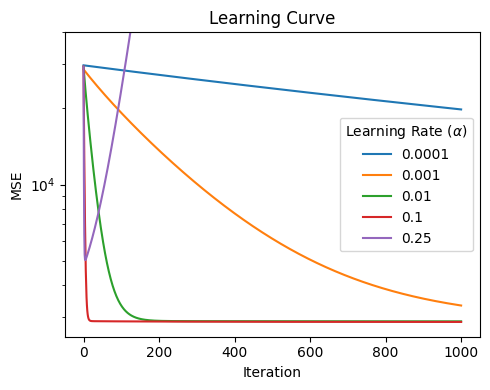

In [9]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 2.5e-1]

model = OrdinaryLinearRegressionGradientDescent(
    standardize=True, verbose=False
    )
plt.figure(figsize=(5, 4))
for alpha in alphas:
    model.learning_rate = alpha
    model.fit(X, y, reset=True)
    plt.semilogy(model.loss)
    # plt.loglog(model.loss)

plt.ylim((2.5e3, 4e4))
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(title=r'Learning Rate $(\alpha)$', labels=[f'{alpha}' for alpha in alphas])
plt.tight_layout()

### Learning Rate Analysis Results

**1. Learning Rate Effects:**

- **Small learning rate** ($\alpha$ small):
  - Slower convergence (more iterations needed)
  - Higher stability (smooth, consistent updates)
  - Lower risk of overshooting the minimum
  
- **Large learning rate** ($\alpha$ large):
  - Faster initial convergence
  - Lower stability (may oscillate or diverge)
  - Higher final MSE if it overshoots the optimal solution
  - Risk of numerical instability

**2. Early Stopping Implementation:**

An effective automatic stopping criterion should:
- Monitor the change in MSE between consecutive iterations
- Stop when the change becomes insignificant (below a tolerance threshold)
- Prevent unnecessary iterations once convergence is achieved
- Balance between accuracy and computational efficiency

**Implementation Strategy:**
- Track loss history during training
- Calculate difference: $|\text{MSE}_{t} - \text{MSE}_{t-1}|$
- Stop when difference < tolerance (e.g., $10^{-6}$) 

## Part 2: Ridge Regression (L2 Regularization)

Ridge regression extends OLS by adding an $L_2$ penalty term to prevent overfitting and handle multicollinearity.

### Mathematical Formulation

The Ridge loss function is:

$$L(y,\hat{y})=\sum_{i=1}^{N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$$

where:
- $y^{(i)}$: ground truth value
- $\hat{y}^{(i)}$: predicted value
- $N$: number of examples
- $\lambda$: regularization parameter (controls penalty strength)

### Implementation Approach

1. **Derive Analytical Solution**: Prove that $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$ by taking the derivative of the loss function
2. **Extend Existing Classes**: Modify both `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` to support Ridge regression using inheritance or parameter addition
3. **Noise as Regularizer**: Explore the connection between adding multiplicative noise to features and Ridge regularization

**Key Insight**: The $L_2$ penalty shrinks weights toward zero, reducing model complexity and preventing overfitting while maintaining all features.


$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2=
\sum_{i=1}^N \left( y^{(i)} - (Xw)^{(i)} \right)^2 + \lambda \|w\|_2^2$

with matrix notation

$L(w) = (y - Xw)^T (y - Xw) + \lambda w^T w = (y - Xw)^T (y - Xw) = y^T y - 2w^T X^T y + w^T X^T X w + \lambda w^T w =$ 

$y^T y - 2w^T X^T y + w^T (X^T X + \lambda I) w$

derivative by w:

 $-2 X^T y + 2 (X^T X + \lambda I) w  = 0$
 
 $X^T y + (X^T X + \lambda I) w  = 0$
 
 $(X^T X + \lambda I) w = X^T y$

 $w_{Ridge} = (X^T X + \lambda I)^{-1} X^T y$


In [10]:
class RidgeRegression(OrdinaryLinearRegression):
    """Ridge Regression model."""
    def __init__(self, regularization: float = None) -> None:
        """Initialize OrdinaryLinearRegression model."""
        self.regularization: float = regularization

    def _fit(self, X: NDArray, Y: NDArray) -> None:
        """Internal fitting method.

        Args:
            X: Padded training data of shape (n_samples, n_features + 1)
            Y: Target values of shape (n_samples, 1)
        """
        if not hasattr(self, 'X_train'):
            self.X_train = X
            self.y_train = Y
        if self.w is None:
            self.w = np.linalg.pinv(self.X_train) + self.regularization * np.identity(self.X_train.shape[1])


In [11]:
class RidgeRegressionGradientDescent(OrdinaryLinearRegressionGradientDescent):
    """Ridge Regression using Gradient Descent optimization."""

    def __init__(
            self,
            learning_rate: float,
            num_iterations: int,
            normalize: bool,
            early_stop: bool,
            verbose: bool,
            track_loss: bool,
            regularization: float
            ) -> None:
        """Initialize OLS with Gradient Descent.

        Args:
            learning_rate: Step size for gradient descent
            num_iteration: Maximum number of iterations
            normalize: Whether to normalize features
            early_stop:  Boolean to stop running when loss plateaus
            verbose: Boolean to turn on/off logging
            track_loss: Boolean to save loss results for learning curve visualization
            regularization: parameter to penalize weights
        """
        super(OrdinaryLinearRegressionGradientDescent, self).__init__()
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.normalize = normalize
        self.early_stop = early_stop
        if self.early_stop:
            self.tolerance = 1e-6
        self.verbose = verbose
        self.track_loss = track_loss
        self.regularization = regularization


    def _step(self, X: NDArray, Y: NDArray) -> None:
        """Perform one gradient descent step.

        Args:
            X: Input data of shape (n_samples, n_features)
            Y: Target values of shape (n_samples, 1)
            
        """
        derived_w = 2 * (X.T ( X @ self.w - Y) + self.regularization * self.w)
        return -derived_w * self.learning_rate
    

### Ridge Regression Implementation Notes

The Ridge regression implementation extends the base OLS classes to include L2 regularization. The key modifications are:

1. **Analytical Solution**: Adding $\lambda I$ to $X^TX$ before inversion
2. **Gradient Descent**: Including the regularization term in the gradient calculation
3. **Regularization Parameter**: $\lambda$ controls the tradeoff between fitting the data and keeping weights small

**Regularization Effect:**
- Larger $\lambda$: Stronger penalty, smaller weights, more regularization
- Smaller $\lambda$: Weaker penalty, larger weights, closer to OLS
- $\lambda = 0$: Equivalent to standard OLS

## Part 3: Comparing Ridge and Lasso Regularization

Ridge ($L_2$) and Lasso ($L_1$) regularization control model complexity through different mechanisms:

### Key Differences

**Ridge Regression (L2):**
- Shrinks weights **toward zero** but rarely sets them exactly to zero
- Maintains all features in the model
- Good for handling multicollinearity
- Smooth, continuous weight reduction

**Lasso Regression (L1):**
- Can set weights **exactly to zero**, performing automatic feature selection
- Creates sparse models (fewer active features)
- Useful for feature selection and interpretability
- May arbitrarily select one feature from a correlated group

### Analysis

Coefficient changes are analyzed when varying the regularization parameter $\alpha$ on a logarithmic scale for both Ridge and Lasso. This coefficient path analysis reveals:

- How different features respond to increasing regularization
- The sparsity-inducing property of Lasso vs. the shrinkage property of Ridge
- Optimal regularization strength for each method

**Implementation:** `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso` are used for this comparison.

In [12]:
# Generate data
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degree = 5
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X[:, np.newaxis])

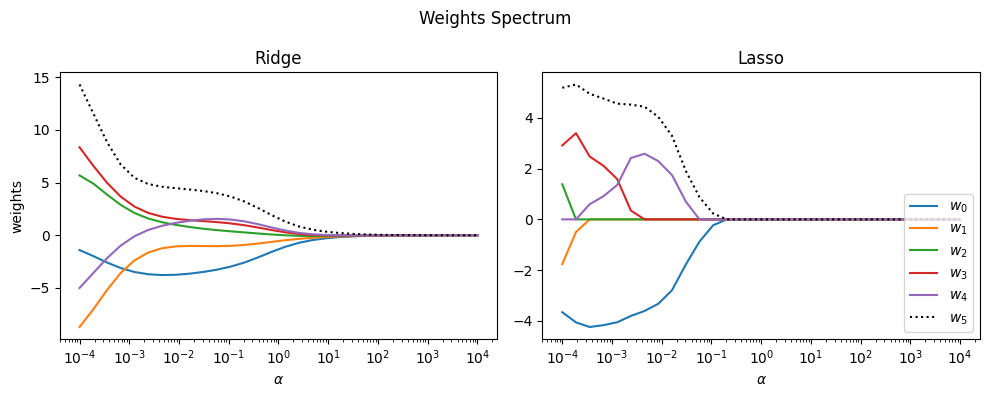

In [13]:
from sklearn.linear_model import Ridge, Lasso

models = [Ridge(), Lasso(max_iter=500000)]
alphas = np.logspace(-4, 4, 30)

plt.figure(figsize=(10, 4))

for i, model in enumerate(models, start=1):
    coef, norm = [], []

    for j, a in enumerate(alphas):
        model.set_params(alpha=a)
        model.fit(X_poly, y)
        coef.append(model.coef_)
        norm.append(np.linalg.norm(model.coef_))

    plt.subplot(1, 2, i)
    plt.plot(alphas, coef)
    plt.plot(alphas, norm, 'k:')
    plt.xscale('log')
    plt.xlabel(r'$\alpha$')
    plt.title(model.__class__.__name__)

    if i==1:
        plt.ylabel('weights')

plt.legend([f'$w_{i}$' for i in range(6)]+[r'$\left\Vert W \right\Vert_2$'], loc='lower right')
plt.suptitle('Weights Spectrum')
plt.tight_layout()

### Regularization Comparison Results

**Key Findings:**

1. **Ridge Regression (L2):**
   - Weights approach zero asymptotically but never reach exactly zero
   - All features remain in the model regardless of regularization strength
   - Provides smooth, continuous weight reduction
   - Better for cases where all features may be relevant

2. **Lasso Regression (L1):**
   - Can set weights exactly to zero, effectively removing features
   - Performs automatic feature selection by eliminating irrelevant features
   - Reduces model variance and complexity
   - Creates simpler, more interpretable models
   - Useful when many features are expected to be irrelevant

3. **Coefficient Path Behavior:**
   - Both methods show similar directional trends (coefficients generally decrease with increasing regularization)
   - Lasso's ability to zero out coefficients creates distinct "feature selection" behavior
   - Ridge's smooth shrinkage provides more stable coefficient paths

**Practical Implications:**
- **Use Ridge** when you believe all features are relevant and want to handle multicollinearity
- **Use Lasso** when you want automatic feature selection and suspect many features are irrelevant
- **Use Elastic Net** (combination of L1 and L2) to get benefits of both approaches
